In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [64]:
# import custom classes
%run eigenfaces.py

# Import data

In [53]:
df_dict = {'label':[]} # dictonary that will be converted in to a dataframe

for i in range(12544):  # 12544 is the number of pixels in our dataset
    df_dict[str(i)] = []

In [54]:
for i in range(5): # number of label/folders in datasets
    for j in range(72): # number of pictures in each folder/ for each label
        path = 'data/development-data-eigenfaces/' + str(i) + '/' +  str(j) + '.png'
        image = Image.open(path).convert('L') # open and convert to grayscale
        data = np.asarray(image).reshape(-1,) # convert to matrix and reshape to vector
        
        df_dict['label'].append(str(i)) # adding data to the 'label' column

        for index, pixel in enumerate(data):
            df_dict[str(index)].append(pixel) # adding data about the pixels


In [55]:
df = pd.DataFrame(df_dict)
df.shape

(360, 12545)

In [56]:
X = df.iloc[:,1:].values
y = df['label'].values

In [57]:
X.shape

(360, 12544)

In [58]:
y.shape

(360,)

# DimensionalityReduction

In [65]:
model = DimensionalityReduction()

In [66]:
model.fit(X,2)

In [67]:
w = model.transform(X)
w.shape

(360, 2)

In [79]:
colors = []

for i in y:
    if i == '0':
        colors.append('green')
    elif i == '1':
        colors.append('red')
    elif i == '2':
        colors.append('blue')
    elif i == '3':
        colors.append('cyan')
    else:
        colors.append('orange')

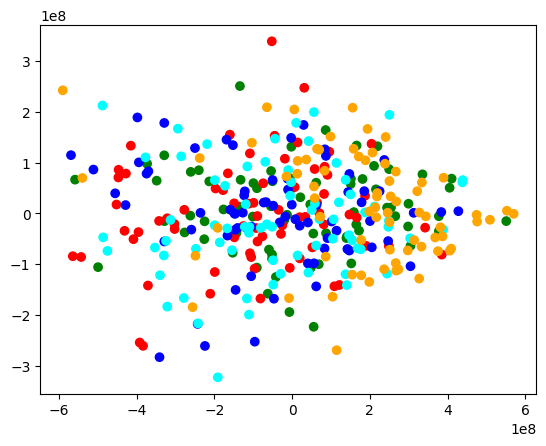

In [80]:
plt.scatter(w[:,0],w[:,1],c=colors)
plt.show()